<h1 align=center><font size = 5> Logistic Regression with Python</font></h1>

In this notebook, you will learn Logistic Regression, and then, you'll create a model for a telecommunication company, to predict when its customers will leave for a competitor, so that they can take some action to retain the customers.


<a id="ref1"></a>
## What is different between Linear and Logistic Regression?

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the **most probable class** for that data point. For this, we use **Logistic Regression**.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
As you know, __Linear regression__ finds a function that relates a continuous dependent variable, _y_, to some predictors (independent variables _x1_, _x2_, etc.). For example, Simple linear regression assumes a function of the form:
<br><br>
$$
y = B_0 + B_1 * x1 + B_2 * x2 +...
$$
<br>
and finds the values of parameters _B0_, _B1_, _B2_, etc, where the term _B0_ is the "intercept". It can be generally shown as:
<br><br>
$$
ℎ_θ(𝑥) = 𝜃^TX
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, _y_, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function, which is called sigmoid function 𝜎:

$$
ℎ_θ(𝑥) = 𝜎({θ^TX}) =  \frac {e^{(B0 + B1 * x1 + B2 * x2 +...)}}{1 + e^{(B0 + B1 * x1 + B2 * x2 +...)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = 𝜎({θ^TX}) = \frac{e^{θ^TX}}{1+e^{θ^TX}} 
$$

In this equation, ${θ^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $𝜎(θ^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

$$
𝜎({θ^TX}) = \frac{1}{1+e^{θ^TX}}
$$

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width = "1024" align = "center">


The objective of __Logistic Regression__ algorithm, is to find the best parameters θ, for $ℎ_θ(𝑥) = 𝜎({θ^TX})$, in such a way that the model best predicts the class of each case.

### Customer churn with Logistic Regression
**Problem** A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you’re an analyst at this company and you have to find out who is leaving and why.

Lets first import required libraries:

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

### About dataset
We’ll use a telecommunications data for predicting customer churn. This is a historical customer data where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it’s less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 


This data set provides info to help you predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


###  Load the Telco Churn data 
Telco Churn is a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. Each case corresponds to a separate customer and it records various demographic and service usage information. Before you can work with the data, you must use the URL to get the ChurnData.csv.


### Load Data From CSV File  

In [2]:
churn_df = pd.read_csv("Datasets/ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


## Data pre-processing and selection

Lets select some features for the modeling. Also we change the target data type to be integer, as it is a requirement  by the skitlearn algorithm:

In [3]:
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [4]:
churn_df = churn_df[['tenure', 'age', 'address', 'income',  'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0.0


In [5]:
churn_df['churn'] = churn_df['churn'].astype('int')

In [6]:
churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,1


In [7]:
churn_df.isna().any()

tenure      False
age         False
address     False
income      False
ed          False
employ      False
equip       False
callcard    False
wireless    False
churn       False
dtype: bool

## Practice
How many rows and columns are in this dataset in total? What are the name of columns?

In [8]:
# write your code here

Lets define X, and y for our dataset:

In [9]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [10]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

Also, we normalize the dataset:

In [11]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

## Train/Test dataset

Okay, we split our dataset into train and test set:

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


# Modeling (Logistic Regression with Scikit-learn)

Lets build our model using __LogisticRegression__ from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.


#### Algorithm to use in the optimization problem.

- For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones.
- For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs' handle multinomial loss; 'liblinear' is limited to one-versus-rest schemes.
- 'newton-cg', 'lbfgs', 'sag' and 'saga' handle L2 or no penalty
- 'liblinear' and 'saga' also handle L1 penalty
- 'saga' also supports 'elasticnet' penalty
- 'liblinear' does not support setting ``penalty='none'``

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models.
__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization. 
Now lets fit our model with train set:

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [14]:
LR = LogisticRegression(C=0.0001, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.0001, solver='liblinear')

Now we can predict using our test set:

In [15]:
yhat = LR.predict(X_test)
yhat 

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1])

In [16]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [17]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.50057499, 0.49942501],
       [0.50137603, 0.49862397],
       [0.5005647 , 0.4994353 ],
       [0.50211635, 0.49788365],
       [0.50063788, 0.49936212],
       [0.50067958, 0.49932042],
       [0.49972852, 0.50027148],
       [0.50145127, 0.49854873],
       [0.49789485, 0.50210515],
       [0.50204749, 0.49795251],
       [0.50140243, 0.49859757],
       [0.50251105, 0.49748895],
       [0.49878081, 0.50121919],
       [0.49820641, 0.50179359],
       [0.50311152, 0.49688848],
       [0.50100729, 0.49899271],
       [0.50019178, 0.49980822],
       [0.49907777, 0.50092223],
       [0.49938465, 0.50061535],
       [0.49975459, 0.50024541],
       [0.5017901 , 0.4982099 ],
       [0.5003778 , 0.4996222 ],
       [0.50203994, 0.49796006],
       [0.50044308, 0.49955692],
       [0.49976993, 0.50023007],
       [0.50405698, 0.49594302],
       [0.50113986, 0.49886014],
       [0.50013855, 0.49986145],
       [0.49965274, 0.50034726],
       [0.50413903, 0.49586097],
       [0.

In [18]:
set(churn_df['churn'])

{0, 1}

## Evaluation

### What is the Jaccard Index?

The Jaccard similarity index (sometimes called the Jaccard similarity coefficient) compares members for two sets to see which members are shared and which are distinct. It’s a measure of similarity for the two sets of data, with a range from 0% to 100%. The higher the percentage, the more similar the two populations. Although it’s easy to interpret, it is extremely sensitive to small samples sizes and may give erroneous results, especially with very small samples or data sets with missing observations.

**How to Calculate the Jaccard Index**

The formula to find the Index is:

$Jaccard Index = (the number in both sets) / (the number in either set) * 100$

The same formula in notation is:

$J(X,Y) = |X∩Y| / |X∪Y|$

In Steps, that’s:

1. Count the number of members which are shared between both sets.
2. Count the total number of members in both sets (shared and un-shared).
3. Divide the number of shared members (1) by the total number of members (2).
4. Multiply the number you found in (3) by 100.

**This percentage tells you how similar the two sets are.**

Two sets that share all members would be 100% similar. the closer to 100%, the more similarity (e.g. 90% is more similar than 89%).
If they share no members, they are 0% similar.
The midway point — 50% — means that the two sets share half of the members.
Examples
A simple example using set notation: How similar are these two sets?

A = {0,1,2,5,6}


B = {0,2,3,4,5,7,9}

**Solution: J(A,B)** = |A∩B| / |A∪B| 

                     = |{0,2,5}| / |{0,1,2,3,4,5,6,7,9}| 
 
                     = 3/9 
                     
                     = 0.33

**Notes:**

The cardinality of A, denoted |A| is a count of the number of elements in set A.
Although it’s customary to leave the answer in decimal form if you’re using set notation, you could multiply by 100 to get a similarity of 33.33%.


Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.



In [19]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.45

### confusion matrix
Another way of looking at accuracy of classifier is to look at __confusion matrix__.

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="green" if cm[i, j] > thresh else "red")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 9  6]
 [ 5 20]]


Confusion matrix, without normalization
[[ 9  6]
 [ 5 20]]


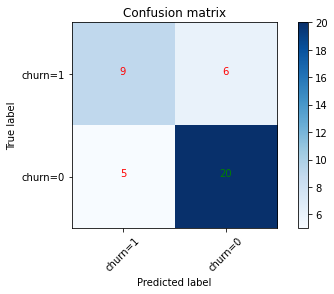

In [21]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Look at first row. The firsr row is for customers whose actual churn value in test set is 1.
As you can calculate, out of 40 customers, the churn value of 15 of them is 1. 
And out of these 15, the classifier correctly predicted 6 of them as 1, and 9 of them as 0. 

It means, for 6 customers, the actual churn value were 1 in test set, and classifier also correctly predicted those as 1. However, while the actual label of 9 customers were 1, the classifier predicted those as 0, which is not very good. We can consider it as error of the model for first row.

What about the customers with churn value 0? Lets look at the second row.
It looks like  there were 25 customers whom their churn value were 0. 


The classifier correctly predicted 24 of them as 0, and one of them wrongly as 1. So, it has done a good job in predicting the customers with churn value 0. A good thing about confusion matrix is that shows the model’s ability to correctly predict or separate the classes.  In specific case of binary classifier, such as this example,  we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives. 

In [22]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78        25
           1       0.64      0.60      0.62        15

    accuracy                           0.73        40
   macro avg       0.71      0.70      0.70        40
weighted avg       0.72      0.72      0.72        40



Based on the count of each section, we can calculate precision and recall of each label:


- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

    
So, we can calculate precision and recall of each class.

__F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.


And finally, we can tell the average accuracy for this classifier is the average of the f1-score for both labels, which is 0.72 in our case.

### log loss
Now, lets try __log loss__ for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. 


In [23]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6909599446660664

## Classification: ROC Curve and AUC

**ROC curve**
An **ROC curve (receiver operating characteristic curve)** is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

* True Positive Rate
* False Positive Rate

**True Positive Rate (TPR)** is a synonym for recall and is therefore defined as follows:

$TPR = \frac{TP}{TP+FN}$

**False Positive Rate (FPR)** is defined as follows:

$FPR = \frac{FP}{FP+TN}$

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

![](https://lh3.googleusercontent.com/-x6DnPfMaQuA/Xu2UqJBQJUI/AAAAAAAAorY/_-rTNBqWYxQS2yMky2RokGQSFRIHSG3fQCK8BGAsYHg/s0/2020-06-19.png)


##### Figure 4. TP vs. FP rate at different classification thresholds.

To compute the points in an ROC curve, we could evaluate a logistic regression model many times with different classification thresholds, but this would be inefficient. Fortunately, there's an efficient, sorting-based algorithm that can provide this information for us, called AUC.

#### AUC: Area Under the ROC Curve
AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

![](https://lh3.googleusercontent.com/-EMlAQ3-xcco/Xu2VEOUqZTI/AAAAAAAAorg/MNKTN9YFEXoMrqRzLsI6aF8LLr7zCmMeQCK8BGAsYHg/s0/2020-06-19.png)


**Figure 5. AUC (Area under the ROC Curve).**

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. For example, given the following examples, which are arranged from left to right in ascending order of logistic regression predictions:


![](https://lh3.googleusercontent.com/-P-VyDvyh-kU/Xu2VTLuX4RI/AAAAAAAAork/xpnMJxks-m0EnXIwKmTAwycXiM_sF5M4ACK8BGAsYHg/s0/2020-06-19.png)


Figure 6. Predictions ranked in ascending order of logistic regression score.

AUC represents the probability that a random positive (green) example is positioned to the right of a random negative (red) example.

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

### AUC is desirable for the following two reasons:

* AUC is `scale-invariant`. It measures how well predictions are ranked, rather than their absolute values.
* AUC is `classification-threshold-invariant`. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.
However, both these reasons come with caveats, which may limit the usefulness of AUC in certain use cases:

* `Scale invariance is not always desirable`. For example, sometimes we really do need well calibrated probability outputs, and AUC won’t tell us about that.

* `Classification-threshold invariance is not always desirable`. In cases where there are wide disparities in the cost of false negatives vs. false positives, it may be critical to minimize one type of classification error. For example, when doing email spam detection, you likely want to prioritize minimizing false positives (even if that results in a significant increase of false negatives). AUC isn't a useful metric for this type of optimization.

In [24]:
y_pred_proba = LR.predict_proba(X_test)[::,1]
print(y_pred_proba)
from sklearn import metrics

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5]


In [25]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

In [26]:
fpr

array([0.  , 0.  , 0.  , 0.04, 0.04, 0.16, 0.16, 0.2 , 0.2 , 0.24, 0.24,
       0.32, 0.32, 0.36, 0.36, 0.44, 0.44, 0.64, 0.64, 1.  ])

In [27]:
tpr

array([0.  , 0.07, 0.27, 0.27, 0.4 , 0.4 , 0.53, 0.53, 0.6 , 0.6 , 0.67,
       0.67, 0.73, 0.73, 0.87, 0.87, 0.93, 0.93, 1.  , 1.  ])

In [28]:
_

array([1.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [29]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

0.8026666666666666

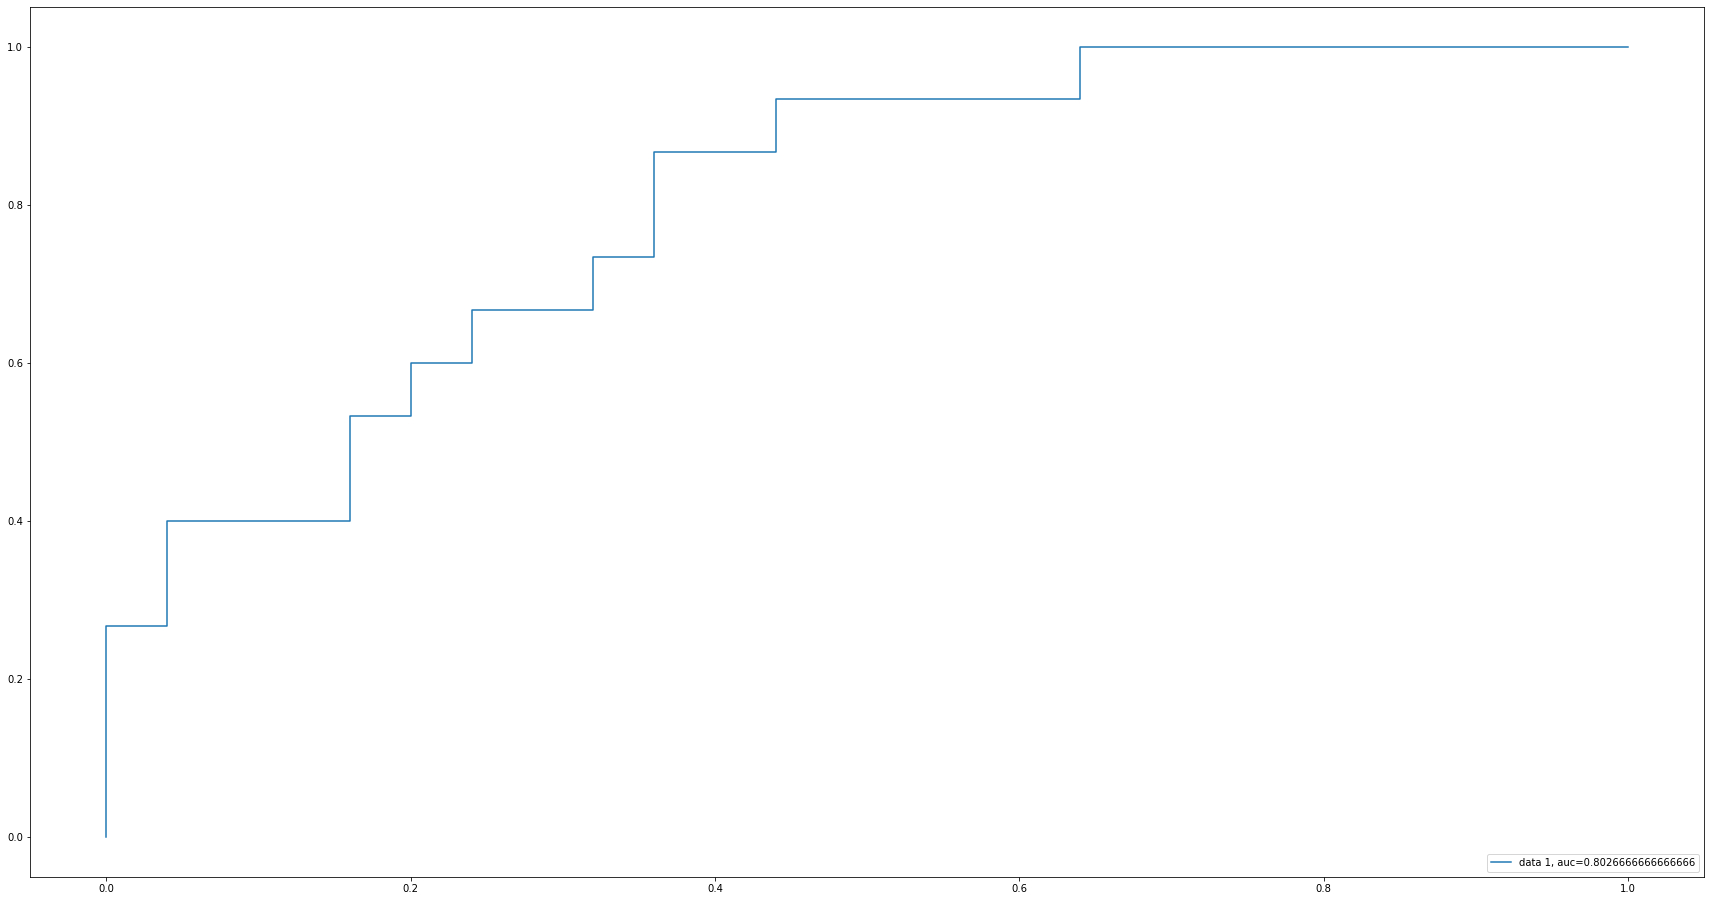

In [30]:
plt.figure(figsize=(30,16))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Practice
Try to build Logistic Regression model again for the same dataset, but this time, use different __solver__ and __regularization__ values? What is new __logLoss__ value?

In [31]:
# write your code here

LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.61


In [32]:
# write your code here

LR2 = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)           
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.61


In [37]:
LR2 = LogisticRegression(C=0.01, solver='lbfgs').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)           
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.61


In [35]:
Solver = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

In [36]:
for i in Solver:
    LR2 = LogisticRegression(C=0.01, solver=i).fit(X_train,y_train)
    yhat_prob2 = LR2.predict_proba(X_test)
    print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))
    Data = pd.DataFrame({'Slover_method':Solver,
                 'LogLoss':log_loss(y_test, yhat_prob2)})
    print(Data)

LogLoss: : 0.60
  Slover_method   LogLoss
0     liblinear  0.601709
1     newton-cg  0.601709
2         lbfgs  0.601709
3           sag  0.601709
4          saga  0.601709
LogLoss: : 0.61
  Slover_method   LogLoss
0     liblinear  0.611429
1     newton-cg  0.611429
2         lbfgs  0.611429
3           sag  0.611429
4          saga  0.611429
LogLoss: : 0.61
  Slover_method   LogLoss
0     liblinear  0.611429
1     newton-cg  0.611429
2         lbfgs  0.611429
3           sag  0.611429
4          saga  0.611429
LogLoss: : 0.61
  Slover_method   LogLoss
0     liblinear  0.611417
1     newton-cg  0.611417
2         lbfgs  0.611417
3           sag  0.611417
4          saga  0.611417
LogLoss: : 0.61
  Slover_method   LogLoss
0     liblinear  0.611361
1     newton-cg  0.611361
2         lbfgs  0.611361
3           sag  0.611361
4          saga  0.611361
